In [29]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_csv('D:\DS\FIFA1\FIFA20_team\players_20.csv')
df.head(4)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.drop('sofifa_id', axis = 1, inplace = True)

In [4]:
df.head(4)

,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.describe().style.format("{:.1f}")

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18278.0,18278.0,18278.0,18278.0,18278.0,18278.0,18278.0,18278.0,18278.0,18278.0,16980.0,18038.0,18038.0,1126.0,16242.0,16242.0,16242.0,16242.0,16242.0,16242.0,2036.0,2036.0,2036.0,2036.0,2036.0,2036.0,18278.0,18278.0,18278.0,18278.0,18278.0,18278.0,18278.0,18278.0,18278.0,18278.0,18278.0,18278.0,18278.0,18278.0,18278.0,18278.0,18278.0,18278.0,18278.0,18278.0,18278.0,18278.0,18278.0,18278.0,18278.0,18278.0,18278.0,18278.0,18278.0,18278.0,18278.0,18278.0,18278.0,18278.0
mean,25.3,181.4,75.3,66.2,71.5,2484037.6,9456.9,1.1,2.9,2.4,4740717.4,20.1,2021.1,12.1,67.7,52.3,57.2,62.5,51.6,64.9,65.4,63.1,61.8,66.4,37.8,63.4,49.7,45.6,52.2,58.7,42.8,55.6,47.3,42.7,52.8,58.5,64.3,64.4,63.5,61.8,63.9,58.2,64.9,62.9,65.2,46.8,55.7,46.4,50.1,53.6,48.4,58.5,46.8,47.6,45.6,16.6,16.4,16.2,16.4,16.7
std,4.7,6.8,7.0,6.9,6.1,5585481.1,21351.7,0.4,0.7,0.8,11030016.3,16.6,1.3,6.7,11.3,14.0,10.4,10.3,16.4,9.8,7.7,7.2,7.5,8.2,10.6,8.4,18.3,19.6,17.4,14.7,17.7,18.9,18.4,17.4,15.2,16.7,15.0,14.8,14.8,9.1,14.2,13.3,11.9,16.0,12.5,19.3,17.3,20.8,19.6,14.0,15.7,11.9,20.1,21.6,21.2,17.7,17.0,16.6,17.1,18.0
min,16.0,156.0,50.0,48.0,49.0,0.0,0.0,1.0,1.0,1.0,13000.0,1.0,2019.0,1.0,24.0,15.0,24.0,23.0,15.0,27.0,44.0,42.0,35.0,45.0,12.0,41.0,5.0,2.0,5.0,7.0,3.0,4.0,6.0,4.0,8.0,5.0,12.0,11.0,11.0,21.0,12.0,14.0,19.0,12.0,20.0,4.0,9.0,3.0,2.0,9.0,7.0,12.0,1.0,5.0,3.0,1.0,1.0,1.0,1.0,1.0
25%,22.0,177.0,70.0,62.0,67.0,325000.0,1000.0,1.0,3.0,2.0,563000.0,9.0,2020.0,6.0,61.0,42.0,50.0,57.0,36.0,59.0,60.0,58.0,57.0,60.8,29.0,58.0,38.0,30.0,44.0,54.0,30.0,50.0,34.0,31.0,43.0,54.0,56.0,57.0,55.0,56.0,56.0,48.0,58.0,56.0,58.0,32.0,44.0,25.0,39.0,44.0,39.0,51.0,29.0,27.0,24.0,8.0,8.0,8.0,8.0,8.0
50%,25.0,181.0,75.0,66.0,71.0,700000.0,3000.0,1.0,3.0,2.0,1200000.0,17.0,2021.0,12.0,69.0,54.0,58.0,64.0,56.0,66.0,65.0,63.0,61.0,66.0,39.0,64.0,54.0,49.0,56.0,62.0,44.0,61.0,49.0,41.0,56.0,63.0,67.0,67.0,66.0,62.0,66.0,59.0,66.0,66.0,66.0,51.0,58.0,52.0,55.0,55.0,49.0,60.0,52.0,55.0,52.0,11.0,11.0,11.0,11.0,11.0
75%,29.0,186.0,80.0,71.0,75.0,2100000.0,8000.0,1.0,3.0,3.0,3700000.0,27.0,2022.0,18.0,75.0,63.0,64.0,69.0,65.0,72.0,70.0,68.0,66.0,72.0,46.0,69.0,64.0,62.0,64.0,68.0,56.0,68.0,62.0,56.0,64.0,69.0,75.0,75.0,74.0,68.0,74.0,68.0,73.0,74.0,74.0,62.0,69.0,64.0,64.0,64.0,60.0,67.0,64.0,66.0,64.0,14.0,14.0,14.0,14.0,14.0
max,42.0,205.0,110.0,94.0,95.0,105500000.0,565000.0,5.0,5.0,5.0,195800000.0,99.0,2026.0,30.0,96.0,93.0,92.0,96.0,90.0,90.0,90.0,92.0,93.0,92.0,65.0,91.0,93.0,95.0,93.0,92.0,90.0,97.0,94.0,94.0,92.0,96.0,97.0,96.0,96.0,96.0,97.0,95.0,95.0,97.0,97.0,94.0,95.0,92.0,95.0,94.0,92.0,96.0,94.0,92.0,90.0,90.0,92.0,93.0,91.0,92.0


#### datos de color

In [6]:
most_expns_plyr = df.loc[df.value_eur == df['value_eur'].max(),'short_name']
print('The most expensive player is', most_expns_plyr.values[0])

top_wage_plyr = df.loc[df.wage_eur == df['wage_eur'].max(),'short_name']
print('The player with the highest wage is', top_wage_plyr.values[0])

The most expensive player is Neymar Jr
The player with the highest wage is L. Messi


In [7]:
print('The country with most players on FIFA 20 is', df['nationality'].value_counts().idxmax())


The country with most players on FIFA 20 is England


# Data Exploration

In [9]:
def combine_positions(row):
    # There are 15 different positions
    positions = row['player_positions'].split(', ') 
    N = len(positions)
    if N < 3:
        # If a player has two positions the first one will be considered as their
        # position, of course, players with only one position won't be affected
        position = positions[0]
        if position in ['ST', 'LW', 'RW','CF']: #4
            return 0 #ATTACKER
        elif position in ['CAM', 'LM', 'CM', 'RM', 'CDM']: #5
            return 1 #MIDFIELDER
        elif position in ['LWB', 'RWB', 'LB', 'CB', 'RB']: #5
            return 2 #DEFENDER
        elif position in ['GK']: #1
            return 3 #GOALKEEPER
    else: # If player has three possible positions
        position_count = [0, 0, 0, 0] 
        for position in positions:
            if position in ['ST', 'LW', 'RW','CF']: #4
                index = 0 #ATTACKER
            elif position in ['CAM', 'LM', 'CM', 'RM', 'CDM']: #5
                index = 1 #MIDFIELDER
            elif position in ['LWB', 'RWB', 'LB', 'CB', 'RB']: #5
                index = 2 #DEFENDER
            elif position in ['GK']: #1
                index = 3 #GOALKEEPER
            else:
                continue 
            position_count[index] += 1 
        # This will count which was the most repeated position and assign it
        # to the player
        return position_count.index(max(position_count))

df['player_positions'] = df.apply(combine_positions, axis=1)

C:\Users\Matias\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skew of the distribution is 0.07089343291701235
Kurtosis of the distribution is 0.05761583098542822


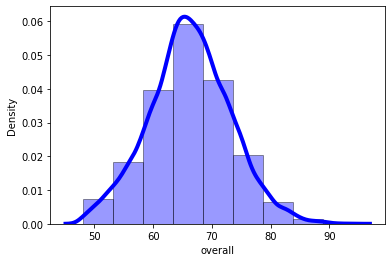

In [12]:
bins = np.linspace(df.overall.min(), df.overall.max(), 10)
sns.distplot(df['overall'], hist=True, 
             bins=bins, color = 'blue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
print('Skew of the distribution is', df['overall'].skew())
print('Kurtosis of the distribution is', df['overall'].kurt())

## Data Preprocessing

In [27]:
df.player_positions[35:45]

35    2
36    1
37    1
38    0
39    0
40    2
41    1
42    1
43    0
44    1
Name: player_positions, dtype: int64

## Splitting the data

In [13]:
df = df[['skill_moves', 'player_positions', 'attacking_crossing', 'attacking_finishing',
         'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys',
         'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
         'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 
         'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power',
         'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
         'mentality_aggression', 'mentality_interceptions', 'mentality_positioning',
         'mentality_vision', 'mentality_penalties', 'mentality_composure',
         'defending_marking', 'defending_standing_tackle', 'defending_sliding_tackle',
         'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
         'goalkeeping_positioning', 'goalkeeping_reflexes']]
df.isnull().sum()

skill_moves                   0
player_positions              0
attacking_crossing            0
attacking_finishing           0
attacking_heading_accuracy    0
attacking_short_passing       0
attacking_volleys             0
skill_dribbling               0
skill_curve                   0
skill_fk_accuracy             0
skill_long_passing            0
skill_ball_control            0
movement_acceleration         0
movement_sprint_speed         0
movement_agility              0
movement_reactions            0
movement_balance              0
power_shot_power              0
power_jumping                 0
power_stamina                 0
power_strength                0
power_long_shots              0
mentality_aggression          0
mentality_interceptions       0
mentality_positioning         0
mentality_vision              0
mentality_penalties           0
mentality_composure           0
defending_marking             0
defending_standing_tackle     0
defending_sliding_tackle      0
goalkeep

Tenemos 0 valores null en nuestro dataframe. 
Los valores de datos se asignaran en consecuencia, predictores (X) y objetivo (Y), luego se dividiran en entrenar y probar.
X incluira todas las habilidades de los jugadores e Y incluira la posicion del jugador.

Inputs form train_test_split:
test_size=0.2 train data will be 80% and test will be 20%
random_state=42 Used to seed a new random state object
stratify=y makes the values splitted proportional

In [14]:
from sklearn.model_selection import train_test_split

# Create X and y
X = df.drop(["player_positions"],axis = 1)
y = df.player_positions

# Split the data to 80-20
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [22]:
from sklearn.neighbors import KNeighborsClassifier

pipe_knn = Pipeline([
    ('sc', StandardScaler()),
    ('knn', KNeighborsClassifier())
    ])

params_knn = {
    'knn__n_neighbors': range(1, 20)
    }

search_knn = GridSearchCV(estimator=pipe_knn,
                      param_grid=params_knn,
                      cv = 5,
                      return_train_score=True)

search_knn.fit(X_train, y_train)
print(f" Best score is: {search_knn.best_score_} with parameters: {search_knn.best_params_}")

 Best score is: 0.8800440328785062 with parameters: {'knn__n_neighbors': 19}


In [23]:
knn = KNeighborsClassifier(n_neighbors = 19)
# Train the model
knn.fit(X_train, y_train)
# Get the predict value from X_test
y_pred_knn = knn.predict(X_test)

In [24]:
from sklearn import metrics
from sklearn.metrics import classification_report

In [25]:
# Report
print(classification_report(y_pred_knn,y_test, digits = 3))
print('accuracy: ', metrics.accuracy_score(y_pred_knn, y_test))

              precision    recall  f1-score   support

           0      0.731     0.870     0.794       586
           1      0.893     0.819     0.854      1500
           2      0.922     0.932     0.927      1163
           3      1.000     1.000     1.000       407

    accuracy                          0.883      3656
   macro avg      0.886     0.905     0.894      3656
weighted avg      0.888     0.883     0.884      3656

accuracy:  0.8832056892778993


In [ ]:
from sklearn.metrics import plot_confusion_matrix
titles_options = [("Unnormalized Confusion Matrix", None),
                  ("Normalized Confusion Matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(knn.fit(X_train, y_train), X_test, y_test,
                                  display_labels=['ATT', 'MID', 'DEF', 'GK'],
                                  cmap='Blues',
                                  normalize=normalize)
    disp.ax_.set_title(title)

In [ ]:
from sklearn.metrics import plot_confusion_matrix
titles_options = [("Unnormalized Confusion Matrix", None),
                  ("Normalized Confusion Matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(knn.fit(X_train, y_train), X_test, y_test,
                                  display_labels=['ATT', 'MID', 'DEF', 'GK'],
                                  cmap='Blues',
                                  normalize=normalize)
    disp.ax_.set_title(title)

In [ ]:
scores_decsT = search_decsT.cv_results_['mean_test_score']
criterion = ['gini', 'entropy']
DEPTH = np.arange(3, 15)
for idx, criterion in enumerate(criterion):
    for score, depth in (zip(scores_decsT[idx*len(DEPTH): (idx+1)*len(DEPTH)], DEPTH)):
        print(f"{depth, criterion}: {score:.10f}")

In [ ]:
decsT = DecisionTreeClassifier(max_depth=8)
decsT.fit(X_train,y_train)
y_pred_decsT = decsT.predict(X_test)

In [ ]:
# Report
print(classification_report(y_pred_decsT,y_test, digits = 3))
print('accuracy: ', metrics.accuracy_score(y_pred_decsT,y_test))

In [ ]:
for title, normalize in titles_options:
    disp = plot_confusion_matrix(decsT.fit(X_train, y_train), X_test, y_test,
                                  display_labels=['ATT', 'MID', 'DEF', 'GK'],
                                  cmap='Blues',
                                  normalize=normalize)
    disp.ax_.set_title(title)

In [ ]:
from sklearn.svm import SVC
import numpy as np

kernels = ['rbf', 'poly', 'sigmoid']
C = np.logspace(-2, 10, 13)

pipe_svm = Pipeline([
    ('sc', StandardScaler()),
    ('SVM', SVC())
    ])

params_svm = {'SVM__C': C,
              'SVM__kernel': kernels,
             }

search_svm = GridSearchCV(estimator=pipe_svm,
                      param_grid=params_svm,
                      cv = 5,
                      return_train_score=True)

search_svm.fit(X_train, y_train)
print(f" Best score is: {search_svm.best_score_} with parameters: {search_svm.best_params_}")

In [ ]:
svc = SVC()
svc.fit(X_train,y_train)
y_pred_svm = svc.predict(X_test)

In [ ]:
# Report
print(metrics.classification_report(y_pred_svm,y_test, digits = 3))
print('accuracy: ', metrics.accuracy_score(y_pred_svm,y_test))

In [ ]:
for title, normalize in titles_options:
    disp = plot_confusion_matrix(svc.fit(X_train, y_train), X_test, y_test,
                                  display_labels=['ATT', 'MID', 'DEF', 'GK'],
                                  cmap='Blues',
                                  normalize=normalize)
    disp.ax_.set_title(title)

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.linear_model import LogisticRegression

solver = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
C = np.logspace(-2, 10, 13)

pipe_lr = Pipeline([
    ('sc', StandardScaler()),
    ('LR', LogisticRegression())
    ])

params_lr = {
    'LR__C': C,
    'LR__solver': solver
    }

search_lr = GridSearchCV(estimator=pipe_lr,
                      param_grid=params_lr,
                      cv = 5,
                      return_train_score=True)

search_lr.fit(X_train, y_train)
print(f" Best score is: {search_lr.best_score_} with parameters: {search_lr.best_params_}")

In [ ]:
lr = LogisticRegression(C=10, solver='newton-cg') 
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)

In [ ]:
# Report
print(metrics.classification_report(y_pred_lr,y_test, digits = 3))
print('accuracy: ', metrics.accuracy_score(y_pred_lr,y_test))

In [ ]:
for title, normalize in titles_options:
    disp = plot_confusion_matrix(lr.fit(X_train, y_train), X_test, y_test,
                                  display_labels=['ATT', 'MID', 'DEF', 'GK'],
                                  cmap='Blues',
                                  normalize=normalize)
    disp.ax_.set_title(title)

In [ ]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

# Evaluate KNN 
jc1 = (jaccard_score(y_test, y_pred_knn, average='weighted'))
fs1 = (f1_score(y_test, y_pred_knn,average='weighted'))

# Evaluate Decision Trees
jc2 = (jaccard_score(y_test, y_pred_decsT, average='weighted'))
fs2 = (f1_score(y_test, y_pred_decsT, average='weighted'))

# Evaluate SVM
jc3 = (jaccard_score(y_test, y_pred_svm, average='weighted'))
fs3 = (f1_score(y_test, y_pred_svm, average='weighted'))

# Evaluate Logistic Regression
jc4 = (jaccard_score(y_test, y_pred_lr, average='weighted'))
fs4 = (f1_score(y_test, y_pred_lr, average='weighted'))
LR_yhat_prob = lr.predict_proba(X_test)

list_jc = [jc1, jc2, jc3, jc4]
list_fs = [fs1, fs2, fs3, fs4]
list_ll = ['NA', 'NA', 'NA',(log_loss(y_test, LR_yhat_prob))]

In [ ]:
# fomulate the report format
report = pd.DataFrame( list_jc,index=['KNN','Decision Tree','SVM','Logistic Regression'])
report.columns = ['Jaccard']
report.insert(loc=1, column='F1-score', value=list_fs)
report.insert(loc=2, column='LogLoss', value=list_ll)
report.columns.name = 'Algorithm'
report

In [ ]:
knn_fit = search_knn.cv_results_['mean_fit_time'].sum()
decsT_fit = search_decsT.cv_results_['mean_fit_time'].sum()
svm_fit = search_svm.cv_results_['mean_fit_time'].sum()
lr_fit = search_lr.cv_results_['mean_fit_time'].sum()

knn_score = search_knn.cv_results_['mean_score_time'].sum()
decsT_score = search_decsT.cv_results_['mean_score_time'].sum()
svm_score = search_svm.cv_results_['mean_score_time'].sum()
lr_score = search_lr.cv_results_['mean_score_time'].sum()

time_knn = knn_fit + knn_score
time_decsT = decsT_fit + decsT_score
time_svm = svm_fit + svm_score
time_lr = lr_fit + lr_score

time_fit = [knn_fit, decsT_fit, svm_fit, lr_fit]
time_score = [knn_score, decsT_score, svm_score, lr_score]
time_fit = [time_knn, time_decsT, time_svm, time_lr]
total_time = [5*x for x in time_fit]

time_report = pd.DataFrame( time_fit,index=['KNN','Decision Tree','SVM','Logistic Regression'])
time_report.columns = ['Time for fit']
time_report.insert(loc=1, column='Time for score', value=time_score)
time_report.insert(loc=2, column='Time per k-fold', value=time_fit)
time_report.insert(loc=3, column='Total time', value=total_time)
time_report.columns.name = 'Algorithm'
time_report.style.format("{:.2f}")

# Player Classification

# Results

# Conclusions